In [1]:
# 10-22-2025

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf


import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.layers import Normalization

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

In [14]:
fires = pd.read_csv("../topo/fires_with_slope.csv")

In [15]:
fires.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,time,ndvi,pop_density,slope
0,110,2005,2453540.5,10.0,Equipment Use,33.718889,-117.433611,110,73.04,89,0.062992,6.028589,1970-01-01 00:00:00.002453540,5016.0,1631.960938,543.52300
1,155,2005,2453411.5,3.0,Debris Burning,34.748333,-119.410278,155,58.46,79,0.000000,4.536979,1970-01-01 00:00:00.002453411,3357.0,0.696928,1002.20950
2,178,2005,2453544.5,4.2,Equipment Use,34.466667,-119.828333,178,77.54,76,0.000000,15.972654,1970-01-01 00:00:00.002453544,4356.0,24.228647,102.41041
3,1053,2005,2453559.5,3.0,Miscellaneous,34.479444,-118.768611,1053,82.76,86,0.000000,6.028589,1970-01-01 00:00:00.002453559,3124.0,0.044615,335.07693
4,1282,2005,2453582.5,2.0,Lightning,33.110833,-116.847222,1282,87.62,88,0.000000,8.763207,1970-01-01 00:00:00.002453582,4180.0,0.154729,337.52570


In [16]:
fires.describe()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
count,2.926000e+03,2926.000000,2.926000e+03,2926.000000,2926.000000,2926.000000,2.926000e+03,2926.000000,2926.000000,2926.000000,2926.000000,2925.000000,2926.000000,2926.000000
mean,1.119678e+06,2009.356801,2.455157e+06,698.459740,33.847226,-117.369907,1.119678e+06,83.949132,68.571770,0.003938,8.036604,3166.863248,261.331656,624.748551
std,6.234096e+05,3.011743,1.093919e+03,8030.910191,0.616454,0.966675,6.234096e+05,11.231815,19.486523,0.020734,2.537002,1137.025054,652.147650,416.513490
min,1.100000e+02,2005.000000,2.453406e+06,2.000000,32.552700,-120.574722,1.100000e+02,43.340000,9.000000,0.000000,2.548167,-3000.000000,0.000000,-70.337070
25%,3.691762e+05,2007.000000,2.454122e+06,3.000000,33.521111,-117.776414,3.691762e+05,76.820000,54.000000,0.000000,6.401492,2331.000000,0.454851,340.791967
50%,1.181302e+06,2009.000000,2.455136e+06,6.300000,33.896111,-117.182678,1.181302e+06,85.100000,71.000000,0.000000,7.551274,3020.000000,13.918338,543.042900
75%,1.626262e+06,2012.000000,2.456067e+06,32.000000,34.311111,-116.862188,1.626262e+06,91.940000,85.000000,0.000000,9.058421,3923.000000,133.882072,860.807860
max,1.880442e+06,2015.000000,2.457382e+06,240207.000000,35.000000,-114.203000,1.880442e+06,118.400000,100.000000,0.551181,28.589186,6407.000000,8307.394531,3008.082800


In [17]:
fires = fires.sample(frac=1, random_state = 5)

<Axes: xlabel='FIRE_SIZE', ylabel='Count'>

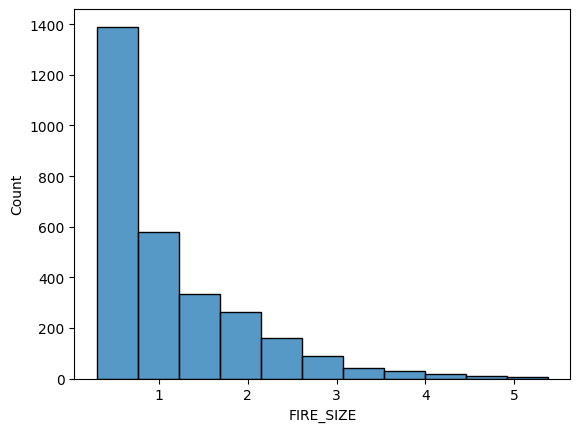

In [18]:
sns.histplot(data=np.log10(fires["FIRE_SIZE"]), bins=11, kde=False)

<Axes: >

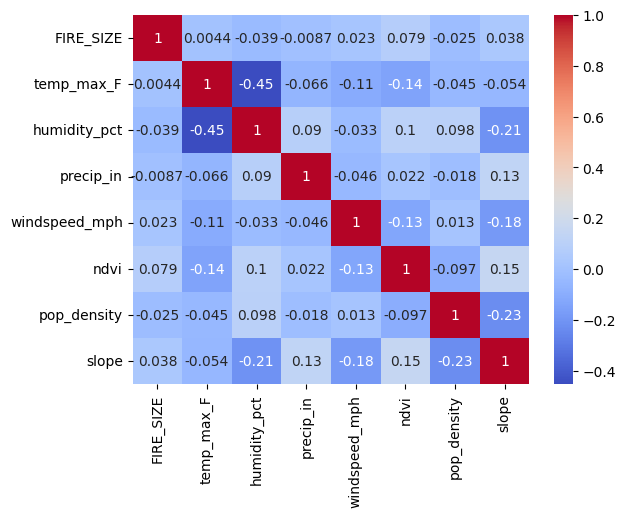

In [19]:
corr = fires[["FIRE_SIZE","temp_max_F","humidity_pct","precip_in","windspeed_mph","ndvi","pop_density","slope"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

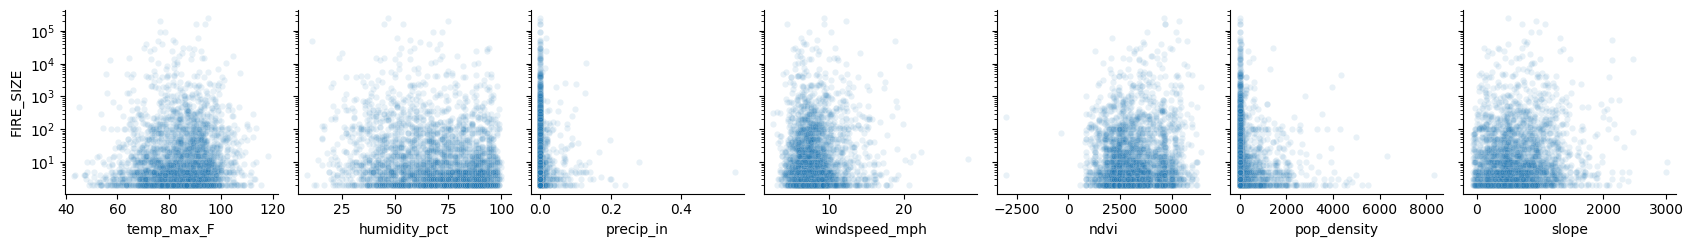

In [20]:
g = sns.pairplot(
    fires,
    x_vars=["temp_max_F", "humidity_pct", "precip_in", "windspeed_mph", "ndvi", "pop_density","slope"],
    y_vars=["FIRE_SIZE"],
    plot_kws={"alpha": 0.1, "s": 20}
)

# Set y-axis to log scale
for ax in g.axes[:, 0]:  # first (and only) column of axes
    ax.set_yscale("log")

plt.show()
# semi log shows streaks in data

In [31]:
fires_data = fires[["FIRE_SIZE","temp_max_F", "humidity_pct", "precip_in", "windspeed_mph", "ndvi", "pop_density","slope"]].copy()
fires_data

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
2797,2.0,95.54,69,0.0,13.486638,1730.0,0.179826,787.20170
1790,3.3,93.20,67,0.0,7.271597,2349.0,190.295441,1092.24910
186,340.0,82.76,72,0.0,8.949658,4448.0,4.345961,774.07770
2504,21.6,75.74,69,0.0,6.712244,2227.0,0.448555,651.74756
976,8.0,78.80,16,0.0,15.972654,4496.0,200.983292,525.34314
...,...,...,...,...,...,...,...,...
2121,47.0,80.78,84,0.0,8.328154,3307.0,5.190183,274.89493
1424,7.0,79.88,93,0.0,12.865134,4649.0,0.000000,832.28200
1725,78.8,102.74,50,0.0,7.147296,832.0,8.337157,433.32376
2254,110.0,93.92,60,0.0,7.022996,4583.0,0.627736,904.42860


In [32]:
fires_data = fires_data.dropna()

In [33]:
fires_data["FIRE_SIZE"] = np.log10(fires_data["FIRE_SIZE"])

C:\Users\Yash\AppData\Local\Temp\ipykernel_24284\1837758870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires_data["FIRE_SIZE"] = np.log10(fires_data["FIRE_SIZE"])


<Axes: xlabel='slope', ylabel='Count'>

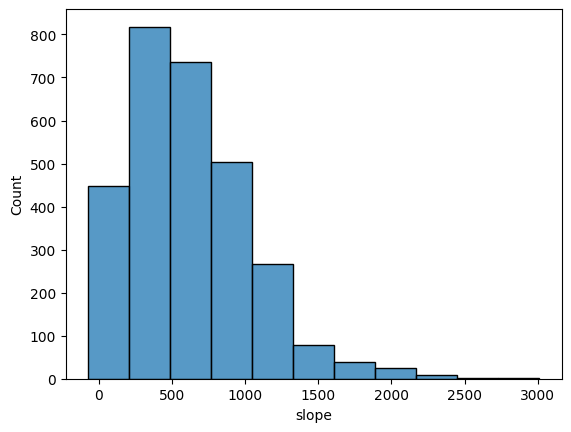

In [28]:
sns.histplot(data=fires["slope"], bins=11, kde=False)
# slope is normal dist

In [29]:
iqr_cols = ["windspeed_mph"] # not including precip bc it has such a long and small tail, everything's just gonna get clipped
zscore_cols = ["temp_max_F", "humidity_pct"]

In [34]:
for col in iqr_cols:
    Q1 = fires_data[col].quantile(0.25)
    Q3 = fires_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.9 * IQR
    upper = Q3 + 1.9 * IQR
    fires_data[col] = fires_data[col].clip(lower, upper)

C:\Users\Yash\AppData\Local\Temp\ipykernel_24284\4005079379.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires_data[col] = fires_data[col].clip(lower, upper)


In [35]:
k = 3 # 3 std from mean (99.7%)
for col in zscore_cols:
    mean = fires_data[col].mean()
    std = fires_data[col].std()
    lower = mean - k * std
    upper = mean + k * std
    fires_data[col] = fires_data[col].clip(lower, upper)

C:\Users\Yash\AppData\Local\Temp\ipykernel_24284\429300987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires_data[col] = fires_data[col].clip(lower, upper)
C:\Users\Yash\AppData\Local\Temp\ipykernel_24284\429300987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires_data[col] = fires_data[col].clip(lower, upper)


In [36]:
fires_data

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
2797,0.301030,95.54,69.0,0.0,13.486638,1730.0,0.179826,787.20170
1790,0.518514,93.20,67.0,0.0,7.271597,2349.0,190.295441,1092.24910
186,2.531479,82.76,72.0,0.0,8.949658,4448.0,4.345961,774.07770
2504,1.334454,75.74,69.0,0.0,6.712244,2227.0,0.448555,651.74756
976,0.903090,78.80,16.0,0.0,13.971411,4496.0,200.983292,525.34314
...,...,...,...,...,...,...,...,...
2121,1.672098,80.78,84.0,0.0,8.328154,3307.0,5.190183,274.89493
1424,0.845098,79.88,93.0,0.0,12.865134,4649.0,0.000000,832.28200
1725,1.896526,102.74,50.0,0.0,7.147296,832.0,8.337157,433.32376
2254,2.041393,93.92,60.0,0.0,7.022996,4583.0,0.627736,904.42860


In [37]:
X = fires_data.drop("FIRE_SIZE", axis=1)
y = fires_data["FIRE_SIZE"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [39]:
power_cols = ["precip_in", "windspeed_mph", "pop_density"]
standard_cols = ["temp_max_F", "humidity_pct", "ndvi","slope"]

In [40]:
std_scaler = StandardScaler()
pwr_scaler = PowerTransformer()

In [41]:
X_train[standard_cols] = std_scaler.fit_transform(X_train[standard_cols])
X_train[power_cols] = pwr_scaler.fit_transform(X_train[power_cols])

X_test[standard_cols] = std_scaler.transform(X_test[standard_cols])
X_test[power_cols] = pwr_scaler.transform(X_test[power_cols])

In [42]:
X_train

,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
1191,-2.284273,0.685029,-0.310953,-1.164227,-0.594696,0.842023,-0.334205
1990,-1.181446,-0.754275,-0.310953,0.044621,0.445292,-1.010709,1.104044
2513,0.456577,-1.114101,-0.310953,0.632677,-0.982280,-0.663631,0.115846
567,-1.116574,1.199066,-0.310953,0.657105,-0.249203,-0.176829,0.614895
2338,-0.273235,1.250470,-0.310953,0.324678,0.577702,-0.366687,-0.971509
...,...,...,...,...,...,...,...
2579,-1.278754,-0.600064,-0.310953,0.482217,-0.334261,-0.680058,-1.062258
1381,-0.451633,0.736433,-0.310953,-0.166033,0.134874,1.364005,-0.424167
2639,-1.489589,1.301873,1.333992,0.351452,0.992470,-0.441925,-0.289915
596,1.024209,-0.445853,-0.310953,-2.313137,-1.073477,0.179577,0.675041


In [43]:
y_train

1191    0.301030
1990    0.778151
2513    1.041393
567     0.477121
2338    0.556303
          ...   
2579    2.800717
1381    1.447158
2639    0.903090
596     0.903090
2672    2.324282
Name: FIRE_SIZE, Length: 2340, dtype: float64

In [44]:
model = Sequential([
    
    
    Dense(32, activation="relu"),
    
    Dense(1)
])

In [45]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [46]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5047 - mae: 0.8705 - val_loss: 0.8782 - val_mae: 0.6582
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8733 - mae: 0.6795 - val_loss: 0.7647 - val_mae: 0.6384
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7337 - mae: 0.6314 - val_loss: 0.7395 - val_mae: 0.6394
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6972 - mae: 0.6307 - val_loss: 0.7220 - val_mae: 0.6358
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6906 - mae: 0.6247 - val_loss: 0.7205 - val_mae: 0.6411
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7239 - mae: 0.6501 - val_loss: 0.7135 - val_mae: 0.6297
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7596 - mae: 0.6482 - val_loss: 0.7110 - val_mae: 0.6396
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7620 - mae: 0.6499 - val_loss: 0.7035 - val_mae: 0.6396
Epoch 9/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6697 - mae: 

In [47]:
loss = model.evaluate(X_test, y_test)
print(f"Test loss mae: {loss[1]}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7745 - mae: 0.6773 
Test loss mae: 0.6525446176528931


In [48]:
y_pred = model.predict(X_test)
y_pred

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[1.1877939 ],
       [0.87147665],
       [1.126776  ],
       [1.0905479 ],
       [1.1809957 ],
       [1.191516  ],
       [0.8761446 ],
       [0.9533803 ],
       [1.0878227 ],
       [1.0107534 ],
       [1.1701943 ],
       [0.9738398 ],
       [1.1136849 ],
       [0.9841065 ],
       [1.1479393 ],
       [1.1335983 ],
       [0.812303  ],
       [0.85833997],
       [1.1783687 ],
       [1.1078461 ],
       [1.0332346 ],
       [1.1218948 ],
       [0.8071179 ],
       [1.13457   ],
       [0.9496927 ],
       [1.5543859 ],
       [1.3043197 ],
       [0.93272316],
       [1.3401717 ],
       [0.7694803 ],
       [1.1503606 ],
       [0.92420936],
       [1.0910704 ],
       [1.3583915 ],
       [1.008587  ],
       [0.7269695 ],
       [1.0142385 ],
       [1.2474707 ],
       [0.9546575 ],
       [0.82443464],
       [1.020441  ],
       [1.3794973 ],
       [1.2954841 ],
       [1.0264665 ],
       [1.7138078 ],
       [1.1287366 ],
       [0.8313356 ],
       [1.009

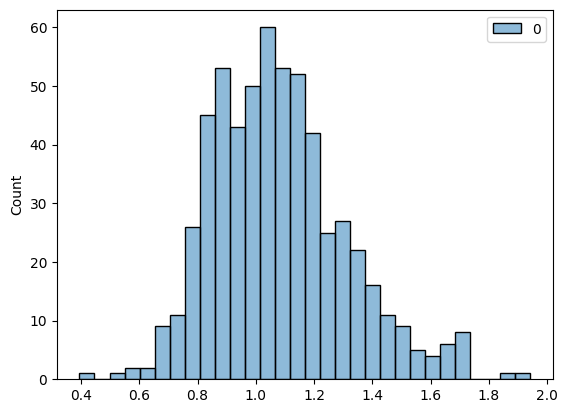

In [49]:
sns.histplot(data=y_pred, bins=30, kde=False)
plt.show()

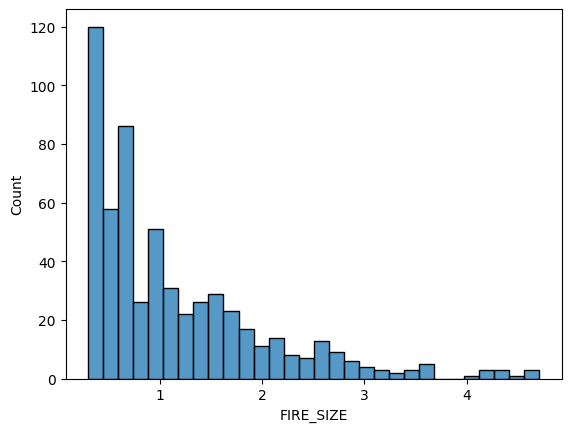

In [50]:
sns.histplot(data=y_test, bins=30, kde=False)
plt.show()

In [51]:
import shap

In [52]:
background = X_test.to_numpy()
X_test_sample = X_test.to_numpy()
feature_names = X_test.columns.tolist()

In [53]:
explainer = shap.DeepExplainer(model, background)

c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(585, 7))']
  warnings.warn(msg)


In [54]:
shap_values = explainer.shap_values(X_test_sample) # gives array of size (#rows,5,1)
shap_values = np.squeeze(shap_values, axis=2) # converts to (#rows,5)


c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(1170, 7))']
  warnings.warn(msg)


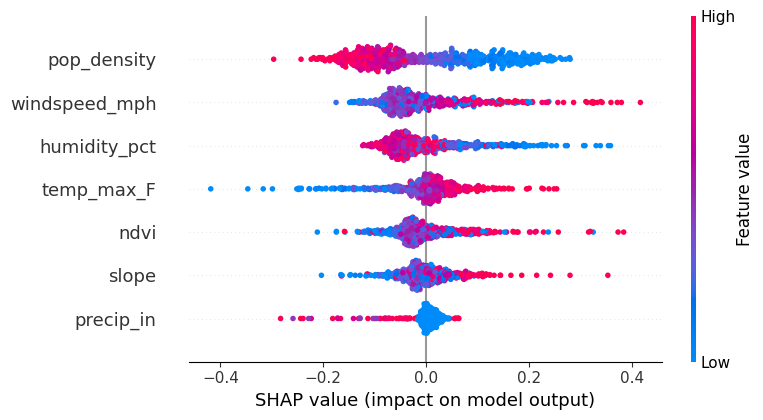

In [55]:
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names)